# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [12]:
def sq_err(ys_a, ys_b):
    return sum((ys_a - ys_b)**2)

def calc_slope(xs,ys):
    return (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) / (np.mean(xs)**2 - np.mean(xs**2))

def r_squared(ys_real, ys_predicted):
    sse = sq_err(ys_real, ys_predicted)
    sst = sq_err(ys_real, np.ones(len(ys_real)) * np.mean(ys_real))
    return round((1 - (sse/sst)),2)

def best_fit(xs,ys):
    m = round(calc_slope(xs,ys),2)
    b = round(np.mean(ys) - (m*np.mean(xs)),2)
    return m,b


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.32
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X +  6.32


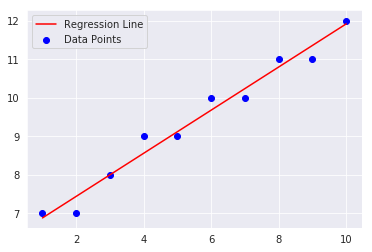

In [26]:
def regression_experiment(X,Y):
    sns.set_style('darkgrid')
    calc_slope(X,Y)
    m,b = best_fit(X,Y)
    ys_predicted = np.array([(m*x + b) for x in X])
    r_2 = r_squared(Y, ys_predicted)
    print("Basic Regression Diagnostics\n----------------------------\nSlope: {}\nY-Intercept: {}\nR-Squared: {}\n----------------------------\nModel: Y = {} * X +  {}".format(m,b,r_2,m,b))
    plt.scatter(X,Y, c='blue', label = 'Data Points')
    plt.plot(X, ys_predicted, c='red', label = 'Regression Line')
    plt.legend()
    return ys_predicted
    
new_ys = regression_experiment(X,Y)


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


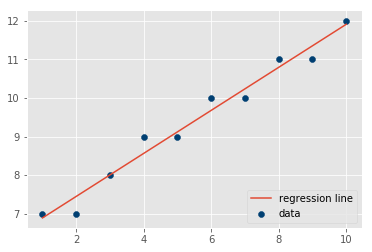

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

In [27]:
new_ys

array([ 6.88,  7.44,  8.  ,  8.56,  9.12,  9.68, 10.24, 10.8 , 11.36,
       11.92])

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

In [22]:
# Make prediction using given value and visualize on the scatter plot
new_x = 4.5
y_predicted = round((0.56 * new_x) + 6.33,1)
y_predicted

8.9

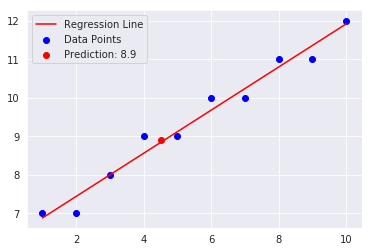

In [28]:
plt.scatter(X,Y, c='blue', label = 'Data Points')
plt.plot(X, new_ys, c='red', label = 'Regression Line')
plt.scatter(new_x, y_predicted, c='red', label = 'Prediction: {}'.format(y_predicted))
plt.legend()

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

In [29]:
import pandas as pd
import csv
df = pd.read_csv('heightWeight.csv')
df.head()

,height,Weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.55
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X +  -204.55


array([172.17, 188.79, 133.39, 177.71, 188.79, 116.77, 194.33, 199.87,
       116.77, 205.41, 133.39, 122.31, 177.71, 172.17, 150.01, 177.71,
       194.33, 161.09, 155.55, 177.71])

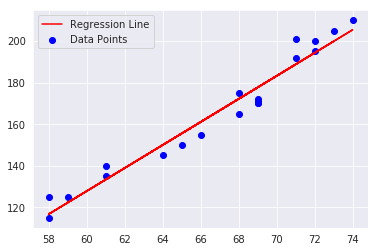

In [30]:
regression_experiment(df.height,df.Weight)

In [31]:
x_new = 65
y_predicted = 5.54 * x_new +  -204.55
y_predicted

155.55

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 